# Welcome to allWomen's Data Science Masterclass!

Who of you has coded before?

For our newbies, here comes your first line of code:

In [ ]:
print('Hello World')

# Overview of what we will see today:



1.   The Data Scientific Method
2.   Study case: Spotify hits 2020

## The Data Scientific Method

![picture](https://drive.google.com/uc?id=1tOFuTRHoez6ZbI03vzY8hUyh9ubvkqca)

[Full article about the Data Scientific Method](https://towardsdatascience.com/a-data-scientific-method-80caa190dbd4)

## Study case: Spotify hits 2020

*Dataset extracted from API Spotify*

# Let's load and import the data!

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px  

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/idoiama/Webinar_DA/master/Sp_Hits2020.csv', index_col=0)
data["release_date"] = pd.to_datetime(data['release_date'])

In [ ]:
data

## Which is the name of our variables?

In [ ]:
data.columns

## Variable types?

We normally distinguish between **`categorical`** (they contain text!)


and **`numerical`** variables (numbers on it)

In [ ]:
data.dtypes

Let's have a look at one Categorical variable, such as: **`name`**

In [ ]:
data.name

.. and one **`numerical`** variable

In [ ]:
data['duration_ms']

## Missing values?

In [ ]:
data.isnull().sum().sort_values(ascending=False)

    Let's drop those columns! They are not adding any important information

In [ ]:
data = data.drop(['liveness', 'tempo'], axis=1)

# Meet the data, ask some questions to your dataset

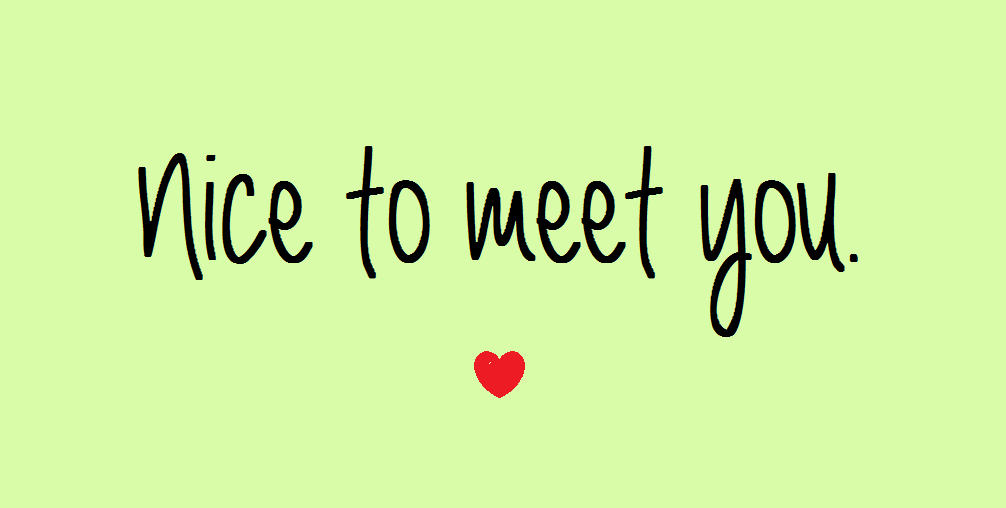


## Question 1. How many hits do we have in our dataset?

In [ ]:
data.shape

In [ ]:
print('The dataset has : %2d hits and %2d variables' %data.shape)

## Question 2. When was each hit created?

In [ ]:
data['release_date']

     Let's create new variables! `year_added`, `month_added`and `month-year_added`
   
    

In [ ]:
data['year_added'] = data['release_date'].dt.year
data['month_added'] = data['release_date'].dt.month
data['month_year'] =  data['release_date'].dt.strftime('%Y-%m')

In [ ]:
print('The dataset has : %2d songs and %2d features' %data.shape)

### Let's create some plots to visualise the total number of songs created by year-month

**SCATTER PLOTS**
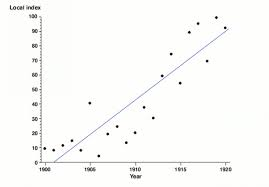


In [ ]:
month_year = data.month_year.value_counts().reset_index().sort_values(by= 'index')
month_year.columns = ['month_year_added', 'count']

In [ ]:
month_year

In [ ]:
fig = px.scatter(month_year, x='month_year_added', y='count')
fig.update_traces(mode="markers+lines")
fig.show()

## Question 3. Which are the songs relased on 2019?

### See the results through screen

In [ ]:
songs_2019 = data[data['year_added'] == 2019]
songs_2019.loc[:,['name', 'artist', 'album']]

### ..or we can create a bar plot

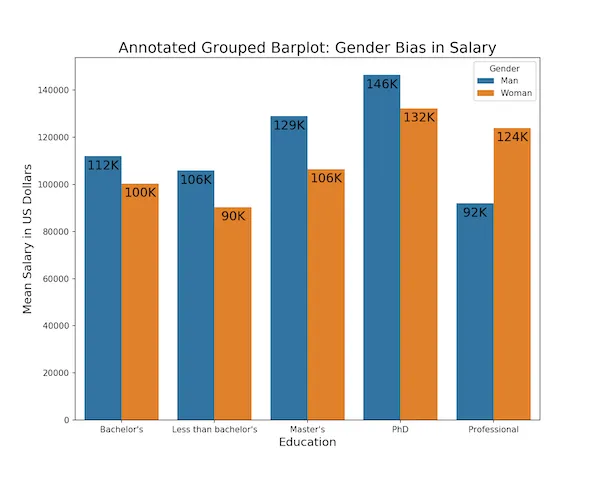

In [ ]:
data['year_added_cat'] = data['year_added'].astype('object')

fig = px.bar(data.sort_values(by= 'year_added'), x='year_added',y= ['name'],
             hover_data=['artist'],color= 'year_added_cat')

fig.update_layout(font=dict(size=9))
fig.show()

**Importance of the colors to impact the audience!**

In [ ]:
fig = px.bar(data.sort_values(by= 'year_added'), x='year_added',y= ['name'],
             hover_data=['artist'],color= 'year_added_cat',
             color_discrete_sequence =['Crimson', 'CadetBlue'])

fig.update_layout(font=dict(size=9))
fig.show()

In [ ]:

fig = px.bar(data.sort_values(by= 'year_added'), x='year_added',y= ['name'],
             hover_data=['artist'],color= 'year_added_cat',
             color_discrete_sequence =['Lime', 'Gainsboro'])

fig.update_layout(font=dict(size=9))
fig.show()

    There are two songs called 'Bésame'!!

In [ ]:
data[data['name'] == 'Bésame'].loc[:,['name', 'artist', 'album']]

## Question 4. What about the gender distribution?

### See the results through screen

In [ ]:
gender = data.gender.value_counts().reset_index()
gender.columns = ['gender_type', 'count']
gender

### Create beautiful plots: `Pie chart`

In [ ]:
fig = px.pie(gender, values='count', names='gender_type',
            color_discrete_sequence = ['DarkOliveGreen', 'PapayaWhip', 'DarkOrange'])
fig.show()

## Question 5. Which are the top continents and countries of the different artists in this top_2020 list?

### Visual representation 1: `Bar and Tree map charts`

In [ ]:
px.bar(data, x= 'continent', color = 'continent')

In [ ]:
data[data['continent'] == 'Unknown']

    Let's dive into the information gathered above:
    
**Continent + Artists**

In [ ]:
fig = px.treemap(data, path=['continent','artist'])
fig.show()

**Can we include the country?**

Yes!

In [ ]:
fig = px.treemap(data, path=['continent','country','artist'])
fig.show()

## Visual representation 2: `Map charts`

In [ ]:
countries = data['country'].value_counts().reset_index()
countries

In [ ]:
fig = px.choropleth(countries,
                    locationmode = 'country names',
                    # Input Pandas DataFrame
                    locations="index",  # DataFrame column with locations
                   color="country") # DataFrame column with color values

fig.update_layout(
    title_text = 'Countries with the most number of hits ' # Create a Title
)

fig.show()  # Output the plot to the screen

    Let's get rid of 'Puerto Rico'

In [ ]:
fig = px.choropleth(countries[1:],
                    locationmode = 'country names',
                    locations="index",  
                   color="country") 

fig.update_layout(
    title_text = 'Countries with the most #hits '
)

fig.show()

# Machine Learning model: recommender system

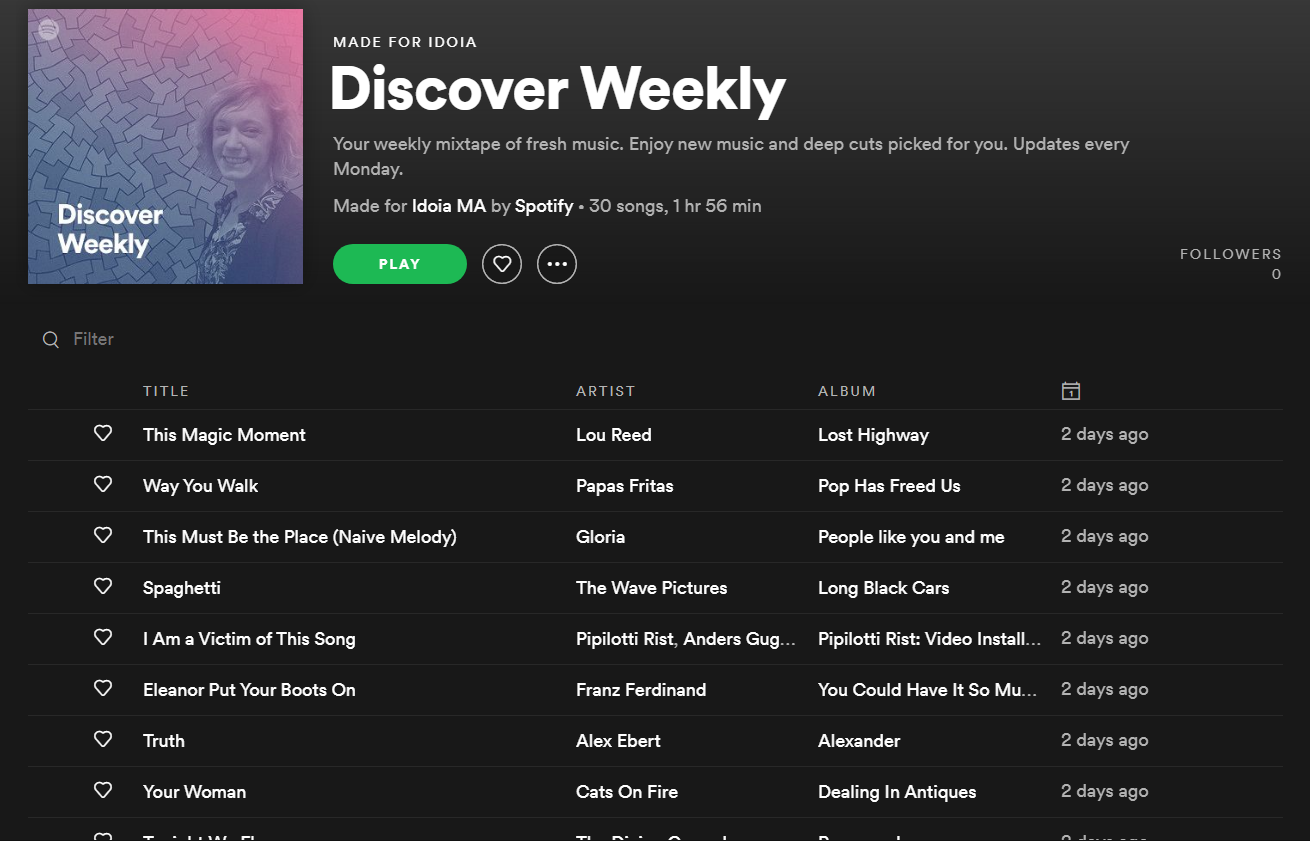


**k-nearest neighbors algorithm (k-NN)**

The k-NN algoritm searches for the  k  similar elements based on a query point at the center; or a threshold distance limit based on a query point, which is in a pre defined radius. 

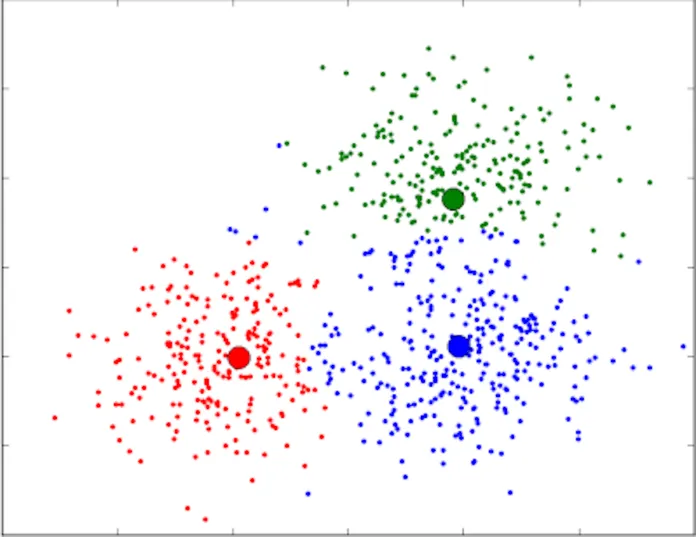

In [ ]:
def knnQuery(queryPoint, arrCharactPoints, k):
    tmp = arrCharactPoints.copy(deep=True)
    tmp['dist'] = tmp.apply(lambda x: np.linalg.norm(x-queryPoint), axis=1)
    tmp = tmp.sort_values('dist')
    return tmp.head(k).index

#Execute k-NN removing the 'query point'
def similarSongs(df, columns, idx,k_num):
    
    arr = df[columns]
    queryPoint = arr.loc[idx]
    arr = arr.drop([idx])   
    tmp = arr
    
    tmp['dist'] = tmp.apply(lambda x: np.linalg.norm(x-queryPoint), axis=1)
    tmp = tmp.sort_values('dist')
    response = tmp.head(k_num).index
    return response

In [ ]:
# Building the model: selecting song and attributes
songIndex = 24

columns = ['acousticness','danceability','energy','key','loudness','mode', 
           'instrumentalness','speechiness','valence','popularity','duration_ms']

# Selecting query parameters
k_num= 3 # k=3

# Querying
response = similarSongs(data, columns, songIndex, k_num)

    Let's test the mathematical model with one song: 

In [ ]:
# Select a song
anySong = data.loc[songIndex]
songName = anySong['name']
songArtist = anySong['artist']


print(songName, songArtist)
print("The song we have chosen is '{}' from {}".format(songName, songArtist))

.. so this is the outcome

In [ ]:
print(songName, songArtist)
print("The song we have chosen is '{}' from {}".format(songName, songArtist))
print(60*'*')
print('The three similar songs are:')

for idx in response:
    simSong = data.loc[idx]
    simSongName = simSong['name']
    simSongArtist = simSong['artist']
    print("'{}' from  {}".format(simSongName, simSongArtist))
    